# Self-Organizing Maps

## Importing the libraries

In [1]:
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11719 sha256=2658a1189ba969cf56d2b3bf72654b07b886a6798896cbc730e30e781a4d0671
  Stored in directory: c:\users\amfim\appdata\local\pip\cache\wheels\ec\7e\00\ac334ebb21e9016a73bef195e9732606217c6894f96bd51e6f
Successfully built minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('data/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM

In [14]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results

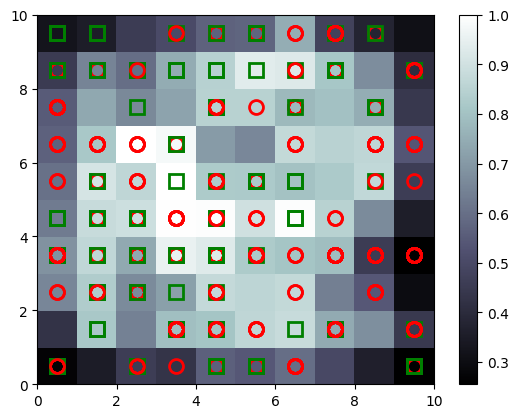

In [15]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds

In [7]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5586183e+07 1.0000000e+00 1.7080000e+01 2.5000000e-01 2.0000000e+00
  1.1000000e+01 4.0000000e+00 3.3500000e-01 0.0000000e+00 1.0000000e+00
  4.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 9.0000000e+00]
 [1.5718921e+07 1.0000000e+00 1.6330000e+01 2.7500000e+00 2.0000000e+00
  6.0000000e+00 4.0000000e+00 6.6500000e-01 0.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 2.0000000e+00 8.0000000e+01 2.2000000e+01]
 [1.5683993e+07 1.0000000e+00 1.6000000e+01 3.1250000e+00 2.0000000e+00
  9.0000000e+00 4.0000000e+00 8.5000000e-02 0.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 7.0000000e+00]
 [1.5744044e+07 1.0000000e+00 2.3250000e+01 1.2625000e+01 2.0000000e+00
  8.0000000e+00 4.0000000e+00 1.2500000e-01 0.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 5.5530000e+03]
 [1.5632010e+07 1.0000000e+00 3.5750000e+01 2.4150000e+00 2.0000000e+00
  9.0000000e+00 4.0000000e+00 1.2500000e-01 0.0000000e+00 1.